# Homework 2: Coding

**Due Tuesday September 27th, 11:59pm.**

**This assignment can be done individually or in groups of two.**

**To submit the coding portion of hw2, provide both hw2.ipynb and hw2.py on Gradescope (One submission per group and don't forget to add your partner's name). Be sure to modify the restriction before sharing.**

**Feel free to modify anything in this notebook unless notified.**

### Imports and Data

In [1]:
"""
Import required libraries.
You should not import any other packages without explicit permission.
"""
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
"""
Run the following code to upload and unzip the data into the Colab environment.
"""
from google.colab import files
uploaded = files.upload()
!unzip hw2_data.zip

Saving hw2_data.zip to hw2_data.zip
Archive:  hw2_data.zip
   creating: hw2_data/
  inflating: hw2_data/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/hw2_data/
  inflating: __MACOSX/hw2_data/._.DS_Store  
   creating: hw2_data/Data_set_2/
  inflating: hw2_data/Data_set_2/y_train_5.txt  
   creating: __MACOSX/hw2_data/Data_set_2/
  inflating: __MACOSX/hw2_data/Data_set_2/._y_train_5.txt  
  inflating: hw2_data/Data_set_2/.DS_Store  
  inflating: __MACOSX/hw2_data/Data_set_2/._.DS_Store  
  inflating: hw2_data/Data_set_2/y_train_100.txt  
  inflating: __MACOSX/hw2_data/Data_set_2/._y_train_100.txt  
  inflating: hw2_data/Data_set_2/X_test.txt  
  inflating: __MACOSX/hw2_data/Data_set_2/._X_test.txt  
  inflating: hw2_data/Data_set_2/y_test.txt  
  inflating: __MACOSX/hw2_data/Data_set_2/._y_test.txt  
  inflating: hw2_data/Data_set_2/X_train_100.txt  
  inflating: __MACOSX/hw2_data/Data_set_2/._X_train_100.txt  
  inflating: hw2_data/Data_set_2/X_train_5.txt  
  inflating:

## Q3: Least Squares Regression (40 points)

Implement the following functions for question 3. Please **do not** use the sklearn implementation of linear regression or other imports beyond those listed above.

### Q3.1: Implementing Linear Regression (11 points)

#### L1 and L2 error (2 points + 2 points)

In [27]:
def L1_error(y, y_hat):
    """
    L1 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L1 error
    """
    # <---- Your code starts here ---->
    L1_error_ = np.sum(np.absolute(y - y_hat))/y.shape[0]
    # <---- Your code ends here ---->
    
    return L1_error_
    
    
    
def L2_error(y, y_hat):
    """
    L2 error loss
    
    Args:
    y ((n,1) np.array): actual labels
    y_hat ((n,1) np.array): estimated labels
    
    Returns:
        float: L2 error
    """
    # <---- Your code starts here ---->
    L2_error_ = np.sum((y-y_hat)**2)/y.shape[0]
    # <---- Your code ends here ---->

    return L2_error_

#### Least Square Regression (3 points)

In [26]:
def LinearRegression(train_data, train_labels):
    """
    Runs OLS on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
    
    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term     
    """
    # <---- Your code starts here ---->
    # Equation: (X^T*X)^-1 * X^T*y
    #print(train_data)
    X = np.vstack([train_data.T, np.ones(len(train_data))]).T 
    #print(X)
    w = np.matmul(np.linalg.inv(np.matmul(X.T, X)), np.matmul(X.T, train_labels))
    #print(w)

    w, b = w[:-1], w[-1]
    # <---- Your code ends here ---->
    
    return (w, b)

#### Ridge Regression (4 points)

In [44]:
def LinearRegressionL2(train_data, train_labels, lambda_):
    """
    Runs linear regression with L2 regularization (ridge) on the given data.
    
    Args:
        train_data ((n,p) np.array): n is the number of training points and p the number of features
        train_labels ((n,1) np.array): training labels for the training data    
        lambda_ (float): scalar weighting the L2 penalty

    Returns
        tuple: (w, b) where w is a (p,1) weight vector, and b the bias term  
    """
    # <---- Your code starts here ---->
    # 
    X = np.vstack([train_data.T, np.ones(len(train_data))]).T 
    # (X^T*X+lambda)^-1*X^T*y
    calculation = np.matmul(np.linalg.inv(np.add(np.matmul(X.T, X), lambda_ * np.identity(train_data.shape[1]+1))), np.matmul(X.T, train_labels))
    w, b = calculation[:-1], calculation[-1]
    # <---- Your code ends here ---->
    
    return (w, b)

### Q3.2: Data Set 1 (synthetic 1-dimensional data) (8 points)

In [29]:
X_train = pd.read_csv('/content/hw2_data/Data_set_1/x_train.txt', header=None).values
y_train = pd.read_csv('/content/hw2_data/Data_set_1/y_train.txt', header=None).values
X_test = pd.read_csv('/content/hw2_data/Data_set_1/x_test.txt', header=None).values
y_test = pd.read_csv('/content/hw2_data/Data_set_1/y_test.txt', header=None).values

#### Q3.2.1: Learning Curve (4 points)

Use your implementation of unregularized least squares regression to learn a regression model from first 10$\%$ of the training data, then 20$\%$ of the training data, then 30$\%$ and so on up to 100$\%$. In each case, measure both the $L_1$ and $L_2$ error on the training examples used, as well as the error on the given test set. Plot a curve showing both errors (on the *y-axis*) as a function of the number of training examples used (on the *x-axis*).

Add the resulting curve to your Latex document.

[0.39915140543876837, 0.45303052226932106, 0.4181474734632731, 0.433420742391033, 0.4709764194360983, 0.46890988870429295, 0.47645005912351196, 0.4680679359179113, 0.48964563703197794, 0.495327912959659]


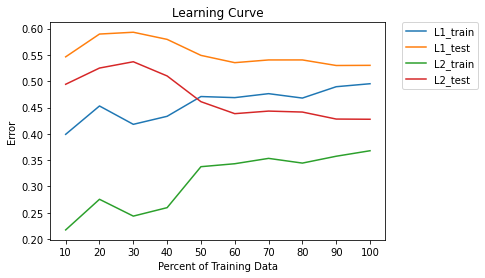

In [30]:
L1_train_errors = [0] * 10
L2_train_errors = [0] * 10
L1_test_errors = [0] * 10
L2_test_errors = [0] * 10

# <---- Your code starts here ---->
#print(w)
# y_hat = w*x+b
list_ind = 0
for i in range(10, 101, 10):
  sample_train = int((len(X_train)*i)/100)
  sample_test = int((len(X_test)*i)/100)

  #print("sample train: " + str(sample_train))
  #print("sample test: " + str(sample_test))
  X_train_2 = X_train[0:sample_train]
  y_train_2 = y_train[0:sample_train]
  X_test_2 = X_test[0:sample_test]
  y_test_2 = y_test[0:sample_test]
  (w, b) = LinearRegression(X_train_2, y_train_2)
  y_hat_train =  np.matmul(X_train_2, w) + b
  y_hat_test = np.matmul(X_test_2,w)+b
  L1_train_errors[list_ind] = L1_error(y_train_2, y_hat_train)
  L1_test_errors[list_ind] = L1_error(y_test_2, y_hat_test)
  L2_train_errors[list_ind] = L2_error(y_train_2, y_hat_train)
  L2_test_errors[list_ind] = L2_error(y_test_2, y_hat_test)
  list_ind+=1

# <---- Your code ends here ---->

print(L1_train_errors)
plt.plot(range(10), L1_train_errors, label ='L1_train')
plt.plot(range(10), L1_test_errors, label ='L1_test')
plt.plot(range(10), L2_train_errors, label = 'L2_train')
plt.plot(range(10), L2_test_errors, label = 'L2_test')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title("Learning Curve")
plt.xlabel("Percent of Training Data")
plt.xticks(range(10), range(10,101,10))
plt.ylabel("Error")
plt.show()

#### Q3.2.2: Analysis of model learned from full training data (4 points)

Write down the weight and bias terms, $\hat{w}$ and $\hat{b}$, learned from the full training data in your Latex document. Also, write down the $L_2$ training and test error of this model. In a single figure, draw a plot of the learned linear function (input instance on the *x-axis* and the predicted value on the *y-axis*), along with a scatter plot depicting the true label associated with each test instance.

Add the resulting plot to your Latex document.

w: [[0.90222293]]
b: [0.03269314]
L2 Training Error: 0.3679586735242827
L2 Testing Error: 0.4277923877510294


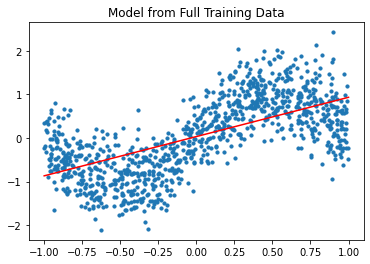

In [31]:
# <---- Your code starts here ---->
(w, b) = LinearRegression(X_train, y_train)
y_hat_train = np.matmul(X_train, w) + b
y_hat_test = np.matmul(X_test, w) + b
print("w: " + str(w))
print("b: " + str(b))
l2_train_error = L2_error(y_train, y_hat_train)
l2_test_error = L2_error(y_test, y_hat_test)
print("L2 Training Error: " + str(l2_train_error))
print("L2 Testing Error: " + str(l2_test_error))
 

# <---- Your code ends here ---->

x = np.linspace(-1, 1)
plt.plot(x,(x * w + b).T, color='red')
plt.scatter(X_test, y_test, s=10)
plt.title('Model from Full Training Data')
plt.show()

### Q3.3: Data Set 2 (real 12-dimensional data) (21 points)

#### Q3.3.1-3.3.2: Regression on different portions of training data (6 points + 6 points)

#### Regression on 5$\%$ of the training data. 
Use your implementation of $L_2$-regularized least squares regression to learn a model on 5$\%$ of the training data. Select the regularization parameter from the range $\{$0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000,2000,5000$\}$ using 5-fold cross validation on the relevant training data. Draw a plot showing $\lambda$ on the *x-axis* and the training, test, and cross validation errors on the *y-axis* using the $L_2$ error. 

Then record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors for the chosen value of $\lambda$.
        
#### Regression on 100$\%$ of the training data.

Repeat the above process, but instead learn from the full training data for $L_2$-regularized regression. Plot all of the errors, and record the chosen value of $\lambda$ along with the weight vector, bias term, and all corresponding errors for the chosen value of $\lambda$.

Add the resulting curves to your Latex document.

Chosen lambda: 2
w: [[    67.08145868]
 [  3055.67909343]
 [    54.69893139]
 [  3813.31573132]
 [ -5578.44702909]
 [-10640.65175015]
 [  5749.09863318]
 [  1009.23632028]
 [  -241.68276576]
 [  1333.60698042]
 [  3695.0385993 ]
 [   925.23480764]]
b: [3629.90337799]
Training error: 70408463.21094105
Validation error: 128019713.91205886
Testing error: 149404817.12307724


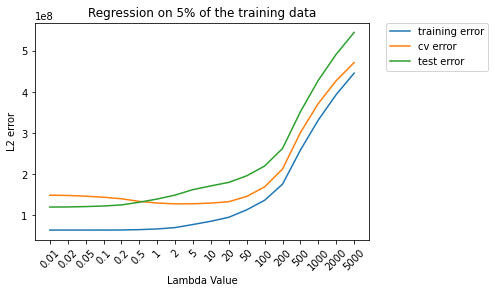

Chosen lambda: 0.5
w: [[    39.37818835]
 [  1008.11420604]
 [   734.11200175]
 [  1320.59237091]
 [ -9102.39095707]
 [-14131.67155068]
 [  4186.85721174]
 [   466.42022024]
 [   703.23285461]
 [  3996.51727253]
 [   929.10506371]
 [  1271.86710172]]
b: [24886.55526622]
Training error: 86788635.72657265
Validation error: 89346140.64531562
Testing error: 91589366.03702724


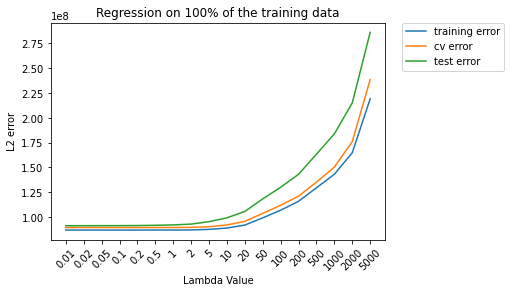

In [105]:
from numpy.lib.function_base import trapz
for percent in [5, 100]:
#for percent in [5]:
    train_error = []
    cv_error = []
    test_error = []
    lambdas = [0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50,100,200,500,1000,2000,5000]
    
    X_test = pd.read_csv('/content/hw2_data/Data_set_2/X_test.txt', header=None).values
    y_test = pd.read_csv('/content/hw2_data/Data_set_2/y_test.txt', header=None).values
    X_train = pd.read_csv('/content/hw2_data/Data_set_2/X_train_'+str(percent)+'.txt', header=None).values
    y_train = pd.read_csv('/content/hw2_data/Data_set_2/y_train_'+str(percent)+'.txt', header=None).values

    # create folds
    n = len(X_train)
    #print(n)
    fold_lengths = n/5
    folds_X = []
    folds_y = []
    start_ind = 0
    end_ind = int(fold_lengths)
    for i in range(5):
      fold_x = X_train[int(start_ind):int(end_ind)]
      fold_y = y_train[int(start_ind):int(end_ind)]
      start_ind = end_ind
      end_ind = end_ind + fold_lengths
      folds_X.append(np.array(fold_x))
      folds_y.append(np.array(fold_y))
    
    cv_xsets_train = []
    cv_ysets_train = []
    cv_xsets_val = []
    cv_ysets_val = []

    for i in range(5):
      train_data_X = np.zeros((8, 12))
      train_data_y = np.zeros((8, 1))
      val_x = folds_X[i]
      val_y = folds_y[i]
      cv_xsets_val.append(val_x)
      cv_ysets_val.append(val_y)
      for j in range(5):
        if i != j:
          train_data_X = np.vstack((train_data_X, folds_X[j]))
          train_data_y = np.vstack((train_data_y,  folds_y[j]))
        
      cv_xsets_train.append(train_data_X[8:len(train_data_X)])
      cv_ysets_train.append(train_data_y[8:len(train_data_y)])



    #print()
    # <---- Your code starts here ---->
    for lambda_ in lambdas:
      (w,b) = LinearRegressionL2(X_train, y_train, lambda_)
      y_hat_train = np.matmul(X_train, w)+b
      y_hat_test = np.matmul(X_test, w) + b
      train_error.append(L2_error(y_train, y_hat_train))
      test_error.append(L2_error(y_test, y_hat_test))

      # kfold cross validation
      cv_lambda_errors = []
      for i in range(5):
        cv_x_train = cv_xsets_train[i]
        cv_y_train = cv_ysets_train[i]
        cv_x_val = cv_xsets_val[i]
        cv_y_val = cv_ysets_val[i]
        (w_cv, b_cv) = LinearRegressionL2(cv_x_train, cv_y_train, lambda_)
        cv_y_hat_val = np.matmul(cv_x_val, w_cv) + b_cv
        cv_lambda_errors.append(L2_error(cv_y_val, cv_y_hat_val))
      cv_error.append(np.mean(cv_lambda_errors))
        
    # Get best lambda
    best_lam_ind = cv_error.index(min(cv_error))
    best_lam_val_error = min(cv_error)
    best_lam = lambdas[best_lam_ind]
    # Train model using the best lambda
    (w_best, b_best) = LinearRegressionL2(X_train, y_train, best_lam)
    best_lam_y_hat_train = np.matmul(X_train, w_best) + b_best
    best_lam_y_hat_test = np.matmul(X_test, w_best) + b_best
    best_train_error = L2_error(y_train, best_lam_y_hat_train)
    best_test_error = L2_error(y_test, best_lam_y_hat_test)
    print("Chosen lambda: " + str(best_lam))
    print("w: " + str(w_best))
    print("b: " + str(b_best))
    print("Training error: " + str(best_train_error))
    print("Validation error: " + str(best_lam_val_error))
    print("Testing error: " + str(best_test_error))

    # <---- Your code ends here ---->
        
    plt.plot(range(len(lambdas)), train_error, label='training error')
    plt.plot(range(len(lambdas)), cv_error, label='cv error')
    plt.plot(range(len(lambdas)), test_error, label='test error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title('Regression on ' + str(percent) + '% of the training data')
    plt.ylabel('L2 error')
    plt.xlabel('Lambda Value')
    plt.xticks(range(len(lambdas)), lambdas, rotation=45)
    plt.show()

#### Q3.3.3-3.3.4: Report on Latex (5 points + 4 points)
Answer the following questions on Latex in the respective section.

3.2.3 For each of the two training sets considered above (5$\%$ and 100$\%$), compare the training and test errors of the models learned using unregularized least squares regression and ridge regression. What can you conclude from this about the value of regularization for small and large training sets?

3.2.4 For each of the two training sets considered above (5$\%$ and 100$\%$), Which $\lambda$ should be larger by theory?why? Do those values align with the conclusion you made in part 3.2.3?


# Submission

**Due Tuesday 27th September, 11:59pm**

There are 3 deliverables you need to submit to Gradescope.

1. A PDF compilation of hw2.tex with your name(s) in agreement.

2. Your .ipynb file. Named, hw2.ipynb

3. Your .py file. Named, hw2.py

(to get 2 and 3, in this Colab notebook go to File -> Download)

If you are working in pairs make sure to add your team member’s name on Gradescope when submitting
